# Introduction to recommender systems  

## Aim: 

The purpose of recommender systems is to match individual users to the product that they are most likely to interact with (or purchase) based on past data about how other users have interacted with the same or similar products.  

This is based on generating a predictive score of item appeal for each individual user.   

## Types of recommender systems  

### Simple recommenders   

These recommenders do not predict item appeal scores for individual users, but focus on ranking individual items by their mass appeal likelihood (i.e. item appeal predictions are based on past inferences of high appeal item characteristics). 

The metric for item ranking (i.e. whether it best reflects the intention behind displaying items to users) will greatly impact the quality of a simple recommender.   

A method of weighting item ranking by the number of unique user interactions is also incorporated, as we consider an item with a high ranking but few user interactions recorded to be less appealing than an iterm with a slightly lower ranking but many user interactions recorded.  

### Content-based recommenders    

The key assumption is that an individual user will prefer items that are similar to items that they have interacted with before.  

This system relies on:  
+ Item metadata (i.e. consistently curated characteristics of an item) and  
+ Historical user item interaction data (i.e. product browsing history) from individual users.  

A method of weighting historical purchases so that the most recent purchases are most highly weighted is also incorporated. This relies on a secondary assumption that the user will have relative freedom in interacting with all items by choice i.e. historical user interaction data is not skewed by the system itself.     

However, a positive feedback loop can easily be created when users are recommended the same item types, which skews their browser history towards recommended item types.  

### Collaborative filtering engines  

The key assumption is that individual new users will behave similarly to past collective users (or user segments). Item predictive scores are calculated for individual users based on the likelihood of past similar users in interacting with this particular item.  

These systems do not require item metadata for generating predictive scores and are widely used. 

# Build a simple recommender 

**Tutorial source:** The Datacamp community tutorial [Beginner Tutorial: Recommender Systems in Python](https://www.datacamp.com/community/tutorials/recommender-systems-python) by Aditya Sharma.    

**Dataset source:** We will use a cleaned csv file of all [45,000 IMDB movies](https://www.kaggle.com/rounakbanik/the-movies-dataset/data) to try and predict the [IMDB Top 250 movies](https://www.kaggle.com/mukul1904/imdb-top-250) using our own simple recommender.   

In [1]:
# Import Python libraries ----
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset as Pandas data frame ---- 
data_filepath = pathlib.Path.cwd().parent.joinpath('data',
                                                   'IMDB_all_movies',
                                                   'movies_metadata.csv') 

film_metadata = pd.read_csv(data_filepath, low_memory=False)  

In [3]:
# View film_metadata ----
film_metadata.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   
2   1995-12-22          0.0   101.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count  
0          7.7     5415.0  
1          6.9     2413.0  
2          6.5       92.0  

[3 rows x 24 columns]

### Step 1: Create ranking metric  

The simplest metric for ranking films would be by the `vote_average` score.  

**Note:** This distribution is slightly negatively skewed (as we would expect most movies to be produced with the intention of being well-received, or the entire movie industry would quickly bankrupt itself).

Text(-9.075000000000003, 0.5, 'Number of films voted')

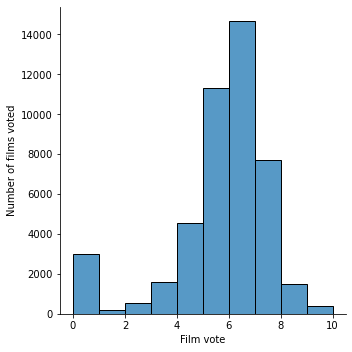

In [4]:
sns.displot(film_metadata["vote_average"], bins=10)
plt.xlabel("Film vote") 
plt.ylabel("Number of films voted")

Alternatively, a weighted metric for ranking films would factor: 
+ A minimum threshold for the number of votes a film needs to have and  
+ A method of weighting the film score by the number of votes (relative to each other so that films with a higher number of votes have a higher `vote_average` score weighting).    

$$WeightedScore = (\frac{v}{v + m} \times R) + (\frac{m}{v + m} \times A)$$


### Step 2: Examine item metadata 

We would be interested in selected the features that we think might collectively contribute to a film's rating. 

In [5]:
# View film_metadata columns ----
film_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# Resources  

+ A [Datacamp community tutorial](https://www.datacamp.com/community/tutorials/recommender-systems-python) covering an introduction to recommender systems for beginners.     
+ Eugene Yan's [blog posts on recommender systems](https://eugeneyan.com/tag/recsys/)  
+ Eugene Yan's [GitHub recommender systems tutorial](https://github.com/eugeneyan/recsys-nlp-graph)   